In [52]:
# %% imports
# libraries
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

# local imports
import MNIST_dataloader
import autoencoder_template

# %% set torches random seed
torch.random.manual_seed(0)

# %% preperations
# define parameters
data_loc = '5LSL0-Datasets' #change the data location to something that works for you
batch_size = 64
no_epochs = 30
learning_rate = 1e-3

# get dataloader
train_loader, val_loader, test_loader = MNIST_dataloader.create_dataloaders(data_loc, batch_size)

# create the autoencoder
model = autoencoder_template.AE()
# create the optimizer
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)
criterion = nn.MSELoss()

# %% training loop
# go over all epochs
def train(model,optimizer,criterion,epochs):
    model.train()
    loss_train = 0.0
    loss_val = 0.0
    train_loss = []
    val_loss = []
    for epoch in range(no_epochs):
        print(f"\nTraining Epoch {epoch}:")
        # go over all minibatches
        for batch_idx,(x_clean, x_noisy, label) in enumerate(tqdm(train_loader)):
            # fill in how to train your network using only the clean images
            if torch.cuda.is_available():
                device = torch.device('cuda:0')
                x_clean, x_noisy, label = [x.cuda() for x in [x_clean, x_noisy, label]]
                model.to(device)
            latent, score = model(x_clean)
            loss = criterion(score,x_clean)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()

        model.eval()
        with torch.no_grad():
            for batch_idx,(x_clean, x_noisy, label) in enumerate(tqdm(val_loader)):
                # fill in how to train your network using only the clean images
                if torch.cuda.is_available():
                    device = torch.device('cuda:0')
                    x_clean, x_noisy, label = [x.cuda() for x in [x_clean, x_noisy, label]]
                    model.to(device)
                latent, score = model(x_clean)
                loss = criterion(score,x_clean)
                loss_val += loss.item()

        
        train_loss.append(loss_train/len(train_loader))
        val_loss.append(loss_val/len(val_loader))
        loss_train = 0.0
        loss_val = 0.0

    torch.save(model.state_dict(), "AE_params.pth")

    return model, latent, score, train_loss, val_loss

#%%
# move back to cpu    
# get some examples
def image_plot(model):
    examples = enumerate(test_loader)
    _, (x_clean_example, x_noisy_example, labels_example) = next(examples)
    latent, score= model(x_clean_example.cuda())
    latent = latent.data.cpu().numpy()
    score = score.data.cpu().numpy()
    # show the examples in a plot
    plt.figure(figsize=(12,3))
    for i in range(10):
        plt.subplot(3,10,i+1)
        plt.imshow(x_clean_example[i,0,:,:],cmap='gray')
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(3,10,i+11)
        plt.imshow(latent[i,0,:,:],cmap='gray')
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(3,10,i+21)
        plt.imshow(score[i,0,:,:],cmap='gray')
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.savefig("Fig/Exercise_1_image.png",dpi=300,bbox_inches='tight')
    plt.show()  

#%%
def loss_plot(train_loss, val_loss):
    plt.figure(figsize=(12,6))
    plt.plot(train_loss,label = "Train loss")
    plt.plot(val_loss, label = "Validation loss")
    plt.title('Train and Validation Losses')
    plt.xlabel('Epoch[n]')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig("Fig/Exercise_1_loss.png",dpi=300,bbox_inches='tight')

#%%
def load_model(model, filename):
    """ Load the trained model.
    Args:
        model (Model class): Untrained model to load.
        filename (str): Name of the file to load the model from.
    Returns:
        Model: Model with parameters loaded from file.
    """
    model.load_state_dict(torch.load(filename))
    return model


In [53]:
model, latent, score, train_loss, val_loss = train(model, optimizer, criterion, no_epochs)


Training Epoch 0:


100%|██████████| 157/157 [00:00<00:00, 160.50it/s]



Training Epoch 1:


100%|██████████| 157/157 [00:01<00:00, 113.09it/s]



Training Epoch 2:


100%|██████████| 157/157 [00:00<00:00, 157.23it/s]



Training Epoch 3:


100%|██████████| 157/157 [00:01<00:00, 119.41it/s]



Training Epoch 4:


100%|██████████| 157/157 [00:00<00:00, 215.61it/s]



Training Epoch 5:


100%|██████████| 157/157 [00:00<00:00, 197.92it/s]



Training Epoch 6:


100%|██████████| 157/157 [00:00<00:00, 207.84it/s]



Training Epoch 7:


100%|██████████| 157/157 [00:00<00:00, 221.99it/s]



Training Epoch 8:


100%|██████████| 157/157 [00:00<00:00, 218.97it/s]



Training Epoch 9:


100%|██████████| 157/157 [00:00<00:00, 221.94it/s]



Training Epoch 10:


100%|██████████| 157/157 [00:00<00:00, 170.27it/s]



Training Epoch 11:


100%|██████████| 157/157 [00:00<00:00, 222.29it/s]



Training Epoch 12:


100%|██████████| 157/157 [00:00<00:00, 197.16it/s]



Training Epoch 13:


100%|██████████| 157/157 [00:00<00:00, 199.39it/s]



Training Epoch 14:


100%|██████████| 157/157 [00:00<00:00, 181.43it/s]



Training Epoch 15:


100%|██████████| 157/157 [00:00<00:00, 200.64it/s]



Training Epoch 16:


100%|██████████| 157/157 [00:00<00:00, 185.52it/s]



Training Epoch 17:


100%|██████████| 157/157 [00:00<00:00, 206.42it/s]



Training Epoch 18:


100%|██████████| 157/157 [00:00<00:00, 177.48it/s]



Training Epoch 19:


100%|██████████| 157/157 [00:00<00:00, 158.79it/s]



Training Epoch 20:


100%|██████████| 157/157 [00:00<00:00, 163.21it/s]



Training Epoch 21:


100%|██████████| 157/157 [00:00<00:00, 160.48it/s]



Training Epoch 22:


100%|██████████| 157/157 [00:01<00:00, 135.49it/s]



Training Epoch 23:


100%|██████████| 157/157 [00:00<00:00, 163.34it/s]



Training Epoch 24:


100%|██████████| 157/157 [00:00<00:00, 160.88it/s]



Training Epoch 25:


100%|██████████| 157/157 [00:00<00:00, 168.92it/s]



Training Epoch 26:


100%|██████████| 157/157 [00:00<00:00, 157.86it/s]



Training Epoch 27:


100%|██████████| 157/157 [00:00<00:00, 166.45it/s]



Training Epoch 28:


100%|██████████| 157/157 [00:00<00:00, 169.85it/s]



Training Epoch 29:


100%|██████████| 157/157 [00:00<00:00, 161.85it/s]


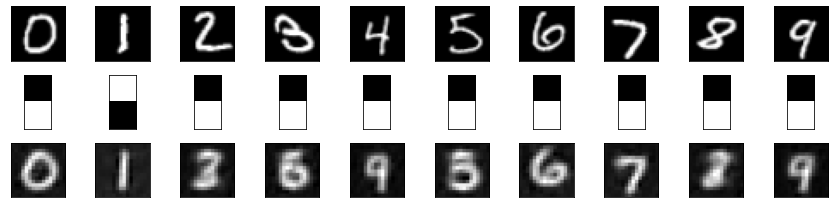

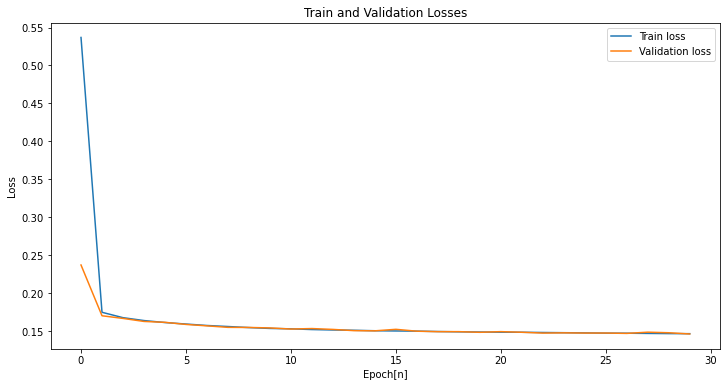

In [54]:
image_plot(model)
loss_plot(train_loss, val_loss)

In [55]:
x_clean_test  = test_loader.dataset.Clean_Images
x_noisy_test  = test_loader.dataset.Noisy_Images
labels_test   = test_loader.dataset.Labels

In [56]:
latent, score= model(x_clean_test.cuda())
latent = latent.data.cpu().numpy()
score = score.data.cpu().numpy()
label = torch.Tensor.numpy(labels_test)

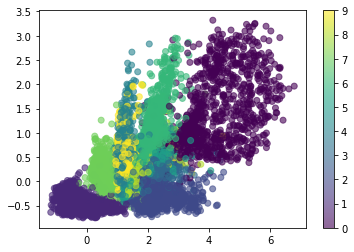

In [66]:
plt.scatter(latent[:,0,1,0], latent[:,0,0,0], c = label, alpha=0.6)
plt.colorbar()